# Exercice de programmation : Régression linéaire

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Régression linéaire avec une seule variable

Avant de procéder à la programmation de l'algorithme de régression linéaire, il est crucial d'assurer la propreté et l'intégrité des données sur lesquelles l'algorithme sera appliqué.

In [25]:
# Chargement des données
df = pd.read_csv('ex1data1.txt',sep=',',header =None)
# Visualisation initiale
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [26]:
# Exploration de la forme
df.shape

(97, 2)

In [27]:
# Résumé statistique
df.describe(include='all')

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [28]:
# Vérification des valeurs manquantes
df.isnull().sum()

0    0
1    0
dtype: int64

In [29]:
# Détection des doublons
df.duplicated().sum()

0

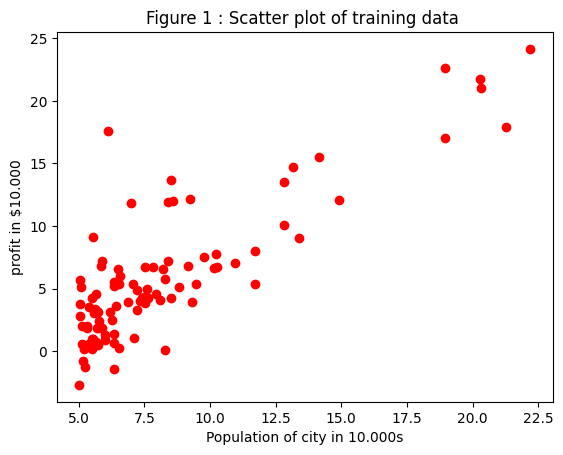

In [30]:
plt.figure()
plt.scatter(df[0],df[1],c='r')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('profit in $10.000')
plt.title('Figure 1 : Scatter plot of training data ')
plt.show()

### Sélection des variables indépendantes et dépendantes

In [31]:
# extrait toutes les colonnes sauf la dernière comme variables indépendantes (features).
x = df.iloc[:, :-1].values
# sélectionne la dernière colonne comme variable dépendante (target).
y = df.iloc[:, -1].values

print(x.shape)
print(y.shape)

(97, 1)
(97,)


### Redimensionnement de y et x 

In [32]:
# transforme les vecteurs x, y en une matrice à une colonne. 
# redimensionner y
y = y.reshape(-1, 1)
# redimensionner x
# garantissant que x est également une matrice à une colonne. Cela est nécessaire si vous travaillez avec une seule variable indépendante pour maintenir la cohérence des dimensions des données.
x = x.reshape(-1, 1)

In [33]:
print(x.shape)
print(y.shape)

(97, 1)
(97, 1)


### Création de la matrice X qui contient la colonne de Bias

In [34]:
# ajoute une colonne de biais (constantes égales à 1) à la matrice x. 
# np.hstack est utilisé pour concaténer horizontalement x et la colonne de biais, 
# permettant ainsi de modéliser l'intercept dans la régression linéaire.
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(97, 2)


### Initialisation des paramètres du modèle (theta)

In [35]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

### Définition du modèle de régression linéaire :

In [36]:
# La fonction model(X, theta) définit le modèle de régression linéaire. 
# Elle calcule le produit scalaire de X (matrice des caractéristiques augmentée d'une colonne de biais) et theta (vecteur des paramètres), 
# ce qui correspond à la prédiction du modèle.
# f(x) = aX + b 
# Note : nous avons déja ajouter une colonne de biais a X
def model(X, theta):
    return X.dot(theta)

### Visualisation des données et de la prédiction initiale : 

 trace la ligne de prédiction du modèle initial sur le même graphique. La couleur rouge (c='r') est utilisée pour distinguer la ligne de prédiction des points de données. Cette ligne est basée sur les valeurs initiales de theta, qui sont aléatoires à ce stade.

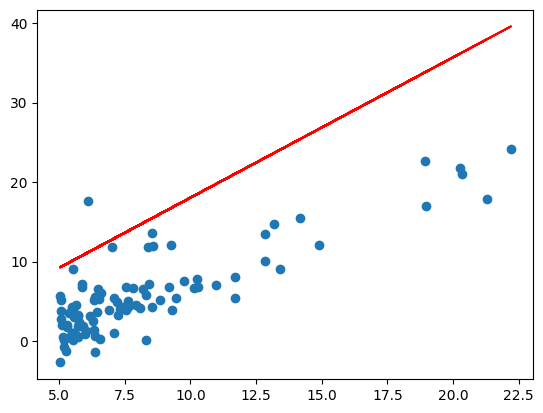

In [37]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

### Fonction de coût :

calcule le coût (ou l'erreur) du modèle en utilisant la méthode des moindres carrés. Le coût est une mesure de la différence entre les prédictions du modèle et les valeurs réelles de y.

In [38]:
def cost_function(X, y, theta):
    # m est le nombre d'observations.
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [39]:
cost_function(X, y, theta)

46.992381222318464

### Algorithme de descente de gradient

In [40]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

gradient_descent(X, y, theta, learning_rate, n_iterations) applique l'algorithme de descente de gradient pour minimiser la fonction de coût. 

Il ajuste itérativement les paramètres theta en se déplaçant dans la direction qui réduit le plus rapidement la fonction de coût. Le taux d'apprentissage (learning_rate) contrôle la taille des pas dans cette direction, et n_iterations détermine le nombre de fois que l'ajustement est effectué.

cost_history est un tableau qui enregistre la valeur de la fonction de coût à chaque itération. Cela permet de surveiller la progression de l'algorithme et de vérifier qu'il converge vers un minimum.

La boucle for met à jour theta en utilisant la règle de mise à jour de la descente de gradient (theta = theta - learning_rate * grad(X, y, theta)) et enregistre le coût à chaque itération.

In [41]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

### Définition des hyperparamètres

In [42]:
# Cela définit le nombre total d'itérations pour lesquelles l'algorithme de descente de gradient sera exécuté.
n_iterations = 1000
# Le taux d'apprentissage contrôle la taille des pas faits vers le minimum de la fonction de coût lors de la mise à jour des paramètres.
learning_rate = 0.01

### Optimisation des paramètres du modèle

In [43]:
# Cette ligne exécute l'algorithme de descente de gradient avec les hyperparamètres spécifiés et les données d'entrainement. 
# Elle retourne les paramètres optimisés (theta_final) et l'historique des coûts (cost_history) après les 1000 itérations.
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [44]:
theta_final

array([[ 1.1236445],
       [-3.2050725]])

### Génération des prédictions : 

Utilise le modèle de régression linéaire avec les paramètres optimisés pour générer des prédictions sur le même ensemble de données utilisé pour l'entraînement.

In [45]:
predictions  = model(X,theta_final)
predictions

array([[ 3.66050773],
       [ 3.00609718],
       [ 6.3668055 ],
       [ 4.66403463],
       [ 3.37925951],
       [ 6.21432694],
       [ 5.19574321],
       [ 6.43366235],
       [ 4.08311043],
       [ 2.47450097],
       [ 3.21172412],
       [12.71022814],
       [ 3.23790504],
       [ 6.24297988],
       [ 3.13306901],
       [ 2.8394607 ],
       [ 3.94737417],
       [ 2.55933613],
       [ 4.01951215],
       [ 4.739993  ],
       [ 3.74927565],
       [19.57120143],
       [ 2.96384814],
       [ 3.90321494],
       [ 3.04789675],
       [18.08237247],
       [11.20903909],
       [ 9.10670024],
       [11.60006737],
       [21.74320624],
       [ 2.69675785],
       [ 4.19907054],
       [ 7.18661652],
       [ 3.41521614],
       [ 6.02128482],
       [ 5.70924874],
       [ 5.89184097],
       [ 3.09441564],
       [11.21802825],
       [ 3.93389044],
       [ 2.87036092],
       [ 4.52841074],
       [ 9.95055725],
       [ 3.28251372],
       [ 5.58710858],
       [ 4

Visualisation des résultats : 

Le code de visualisation crée une nouvelle figure, affiche les données originales sous forme de points avec plt.scatter(x, y), et trace la ligne de régression linéaire ajustée avec plt.plot(x, predictions, c='r'). 

Les labels des axes et le titre ajoutent des informations contextuelles à la visualisation.

Les axes sont étiquetés respectivement 'Population of city in 10,000s' et 'Profit in $10,000', et le titre 'Training data with linear regression fit' indique clairement ce que représente le graphique.

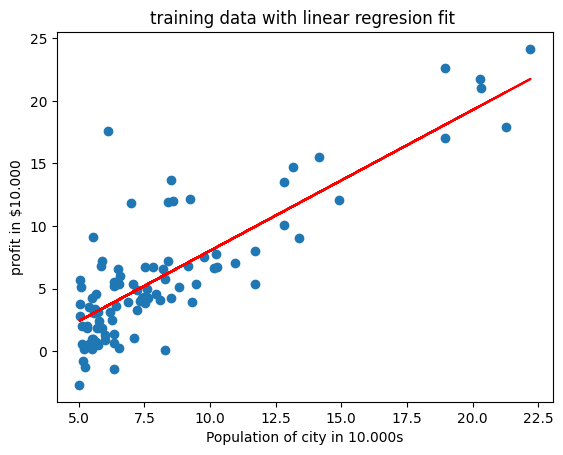

In [46]:
plt.figure()
plt.scatter(x, y)
plt.plot(x,predictions, c='r')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('profit in $10.000')
plt.title('training data with linear regresion fit ')
plt.show()

## Linear regression with multiple variables

Lorsqu'on passe de la régression linéaire simple à la régression linéaire multiple (avec plusieurs variables indépendantes), plusieurs étapes supplémentaires et ajustements sont nécessaires pour traiter efficacement les données et construire le modèle.

In [129]:
df2 = pd.read_csv('ex1data2.txt',sep=',',header =None)
df2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Standardisation des données : 

 La fonction standardization(data) calcule la moyenne et l'écart-type pour chaque variable indépendante, puis standardise les données en soustrayant la moyenne et en divisant par l'écart-type. Cette étape est cruciale dans la régression linéaire multiple pour gérer les variables ayant différentes échelles et pour accélérer la convergence de l'algorithme de descente de gradient.

In [130]:
def standardization(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data, mean, std_dev

In [131]:
normalized_data, mean, std_dev = standardization(df2)

Les mêmes étapes que celles déjà effectuées pour le premier jeu de données sont à revoir pour comprendre l'explication.

### Préparation des matrices X et Y :

In [132]:
X1 = normalized_data.iloc[:, :-1].values
Y = normalized_data.iloc[:, -1].values

In [134]:
# on va utiliser ça juste pour afficher les valeurs non normaliser sur notre graph
x_non_normaliser = df2.iloc[:, 0:2].values
y_non_normaliser = df2.iloc[:, 2].values.reshape(-1,1)

In [133]:
print(X1.shape)
print(Y.shape)

(47, 2)
(47,)


In [135]:
# redimensionner y
Y = Y.reshape(Y.shape[0], 1)
print(Y.shape)

(47, 1)


In [141]:
# Création de la matrice X, inclut le Biais
X = np.hstack((X1, np.ones((X1.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
# X = np.hstack([np.ones((X1.shape[0], 1)), X1])
print(X.shape)

(47, 3)


### Initialisation des paramètres du modèle

In [142]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

### Optimisation du modèle

In [143]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, Y, theta, learning_rate, n_iterations)

### Prédiction

In [144]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[ 8.87354740e-01],
       [-5.57673737e-02],
       [ 4.22533397e-05]])

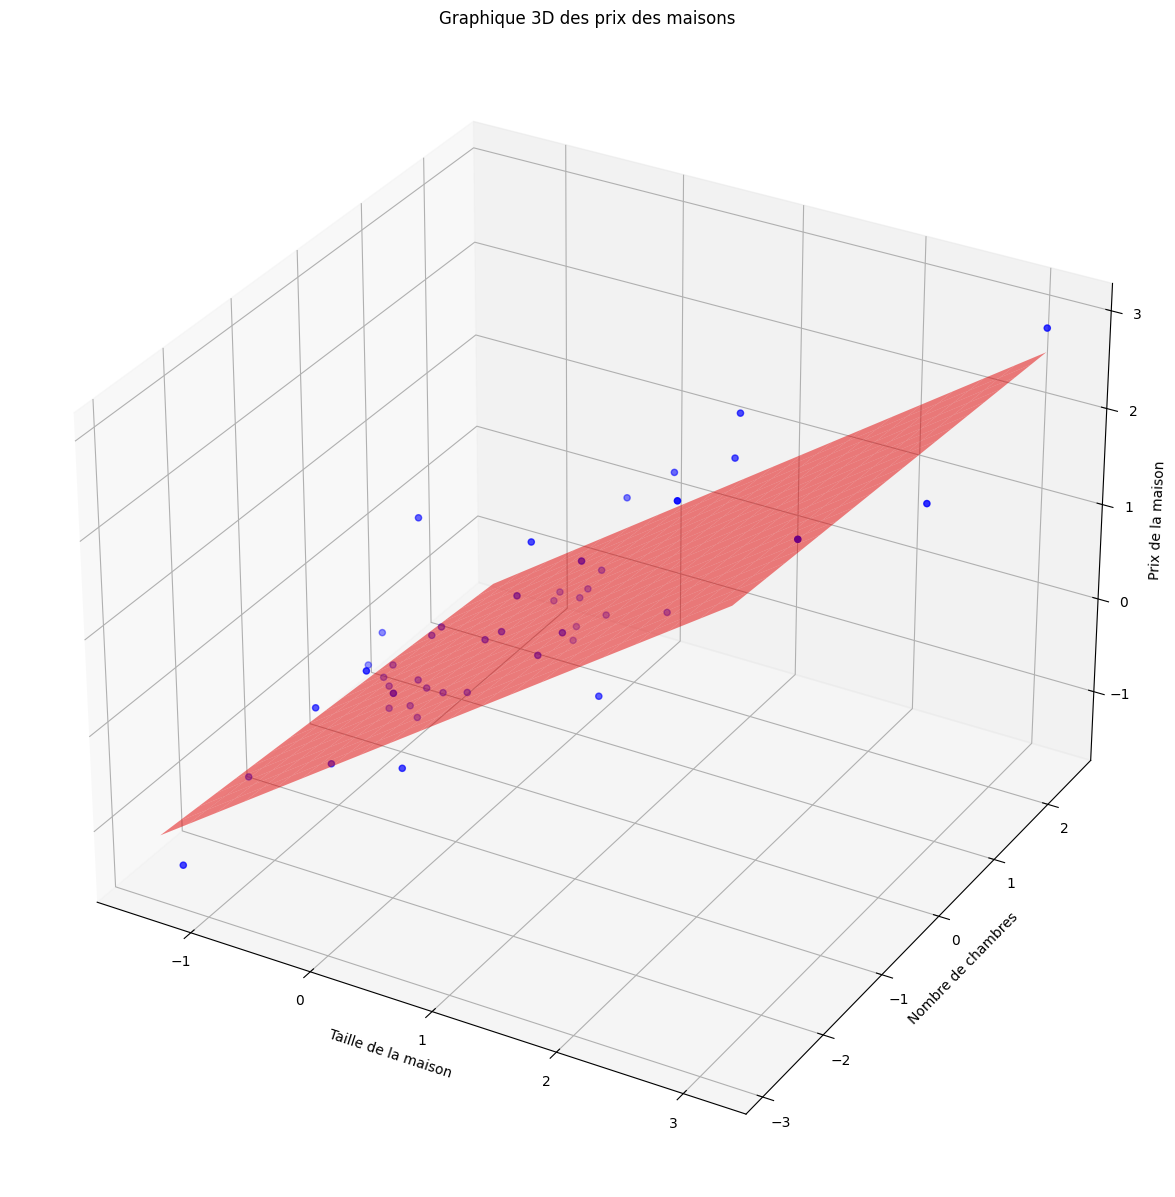

In [162]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Tracé des points pour les données d'entraînement
ax.scatter(X[:,0], X[:,1], Y, label='Données d’entraînement', color='b')

# Création d'une grille pour l'hyperplan
# Vous pouvez ajuster ces lignes pour limiter la plage ou augmenter le pas
x0_range = np.linspace(X[:,0].min(), X[:,0].max(), 20)
x1_range = np.linspace(X[:,1].min(), X[:,1].max(), 20)
x0, x1 = np.meshgrid(x0_range, x1_range)

# Calcul des valeurs de Z pour l'hyperplan
Z = x0 * theta_final[0] + x1 * theta_final[1] + theta_final[2]

# Tracé de l'hyperplan
ax.plot_surface(x0, x1, Z, color='r', alpha=0.5)  # Ajustez alpha selon le besoin pour la visibilité

# Configuration des labels et du titre
ax.set_xlabel('Taille de la maison')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix de la maison')
plt.title('Graphique 3D des prix des maisons')

plt.show()

## Comparaison avec l'algorithme de sklearn

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [165]:
# Division des données en ensembles d'entraînement et de test
X_train , X_test , Y_train , y_test = train_test_split(x ,y , test_size = 0.2)

In [166]:
# creation de model
model = LinearRegression()
results = model.fit(X_train , Y_train)

In [167]:
# # calcule des prediction
Y_pred = model.predict(X_test)

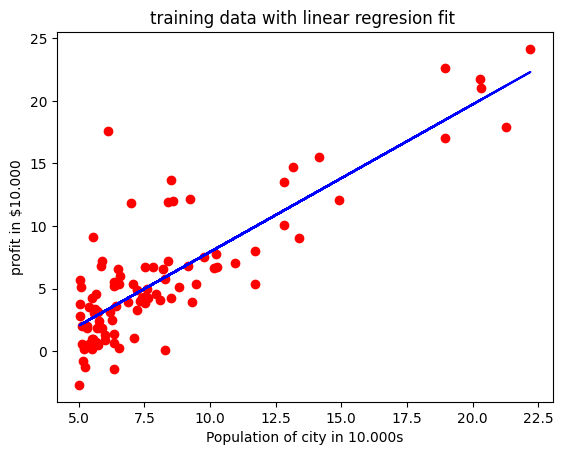

In [168]:
plt.scatter(x, y, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('profit in $10.000')
plt.title('training data with linear regresion fit ')
plt.show()

In [169]:
X_train2 , X_test2 , Y_train2 , y_test2 = train_test_split(X ,Y , test_size = 0.2)

In [170]:
# creation de model
model = LinearRegression()
results = model.fit(X_train2 , Y_train2)

In [171]:
# # calcule des prediction
Y_pred2 = model.predict(X_test2)

In [180]:
X_test2

array([[-0.72968575, -0.22609337,  1.        ],
       [ 2.40309445, -0.22609337,  1.        ],
       [ 0.66817273, -0.22609337,  1.        ],
       [-0.71696639, -0.22609337,  1.        ],
       [-0.14077904, -0.22609337,  1.        ],
       [-0.01994505,  1.10220517,  1.        ],
       [ 0.30185495, -0.22609337,  1.        ],
       [-0.50455295, -0.22609337,  1.        ],
       [ 1.31050078,  1.10220517,  1.        ],
       [-0.69025572, -0.22609337,  1.        ]])

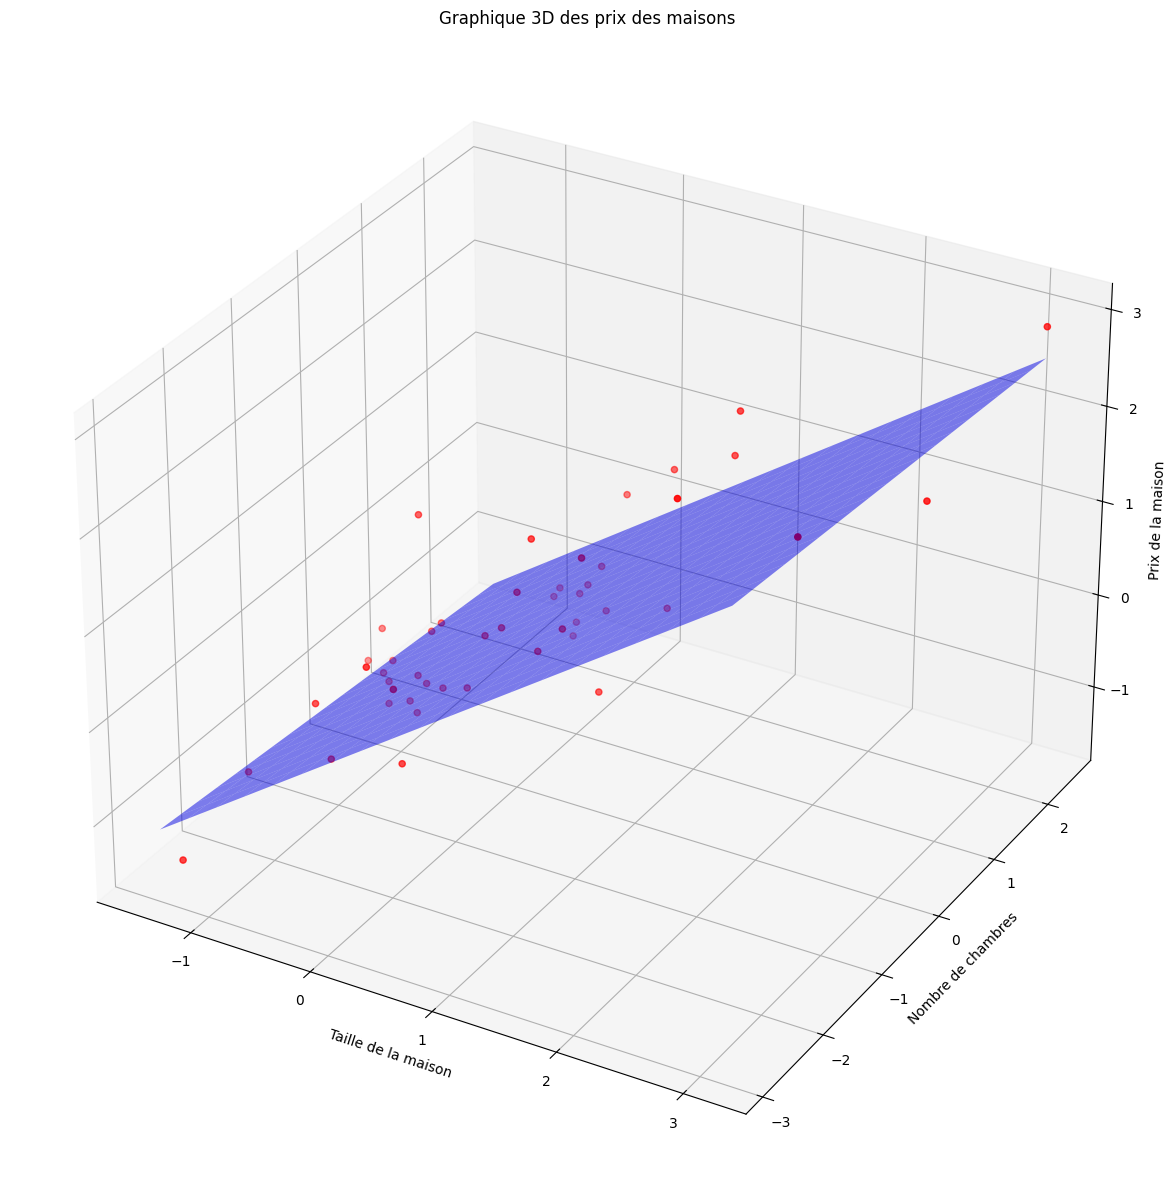

In [183]:
# Préparation de la grille pour l'hyperplan
x0_range = np.linspace(X[:,0].min(), X[:,0].max(), 20)
x1_range = np.linspace(X[:,1].min(), X[:,1].max(), 20)
x0, x1 = np.meshgrid(x0_range, x1_range)
# Ajout d'une troisième caractéristique constante à x0x1 pour la visualisation
x0x1_with_intercept = np.c_[x0.ravel(), x1.ravel(), np.ones(x0.ravel().shape[0])]

# Prédiction sur la grille avec la caractéristique supplémentaire
Z = model.predict(x0x1_with_intercept).reshape(x0.shape)

# Création du graphique 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points de données
ax.scatter(X[:,0], X[:,1], Y, color='red')

# Tracé de l'hyperplan
ax.plot_surface(x0, x1, Z, color='blue', alpha=0.5)

ax.set_xlabel('Taille de la maison')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix de la maison')
plt.title('Graphique 3D des prix des maisons')
plt.show()